In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/used_mobile_phone.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [3]:
#개별 피쳐들 탐색하기
    #date
df["month"] = df["create_date"].apply(lambda x: x[:7])

df["month"].value_counts() #주 거래가 16년 10월, 17년 3월에 활발했음을 알 수 있다.

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

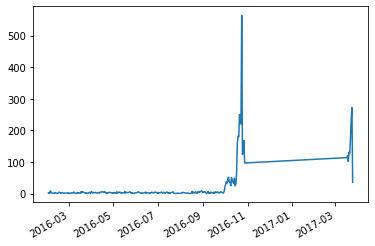

In [4]:
df_day = pd.to_datetime(df["create_date"].apply(lambda x:x[:10])).value_counts() #날짜별로 갯수 계산해줌
df_day.plot()
plt.show()

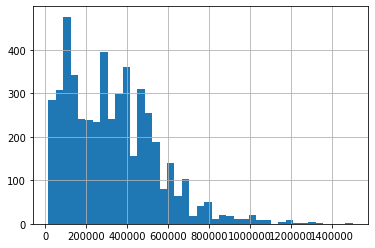

In [5]:
#price 피쳐 탐색하기
df["price"].hist(bins="auto")

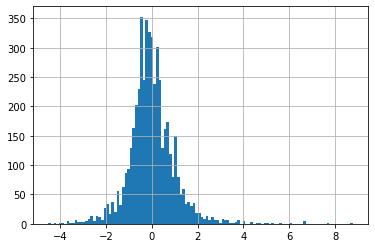

In [6]:
#폰모델별 z-score계산하기
    #기종별 평균과 표준편차 계산하기
df_price_model_mean = df.groupby("phone_model")["price"].transform(lambda x:np.mean(x)) #그냥 mean하면 안되고 np의 mean 형태로
df_price_model_sd = df.groupby("phone_model")["price"].transform(lambda x:np.std(x)) #transform 해줘야 그룹별 계산가능

df_price_model_zscore = (df["price"] - df_price_model_mean)  / df_price_model_sd
df_price_model_zscore.hist(bins="auto")

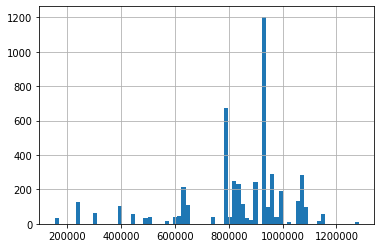

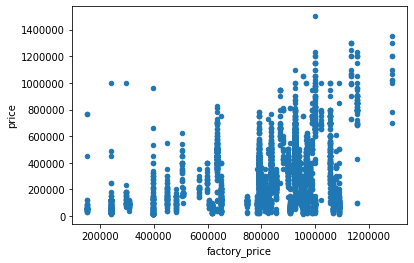

In [7]:
#factory_price 피쳐 탐색하기
df["factory_price"].hist(bins="auto")
df.plot.scatter(x="factory_price",y="price") #양의 상관관계를 띄고 있음

In [8]:
#phone_model 피쳐 탐색하기
model_counts = df["phone_model"].value_counts()
print(model_counts.describe()) #한 모델당 평균적으로 77개의 매물이 나오고 총 64개의 종류가 있음

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1e376730f48>,
 'caps': [<matplotlib.lines.Line2D at 0x1e376910fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e376905d08>],
 'medians': [<matplotlib.lines.Line2D at 0x1e376915f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e376915ec8>],
 'means': []}

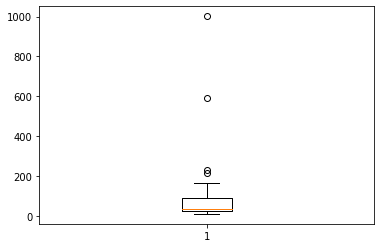

In [9]:
plt.boxplot(model_counts)

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: maker, dtype: int64
count       8.000000
mean      618.875000
std       933.518297
min        25.000000
25%        33.250000
50%        47.000000
75%       918.250000
max      2450.000000
Name: maker, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1e3769796c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e376979f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e376974d08>],
 'medians': [<matplotlib.lines.Line2D at 0x1e37697df08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e376983d88>],
 'means': []}

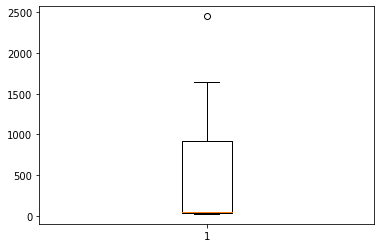

In [10]:
#미니퀴즈 5-1
    #maker 피처 탐색해보기
maker_counts = df["maker"].value_counts()  #총 8개의 회사로 애플과 삼성 순서대로 많은 매물이 등록되었다.
print(maker_counts)                        #평균적으로 한 회사당 600개의 매물이나 표준편차가 크게 되어 있음을 볼 수 있다.
print(maker_counts.describe())              #애플,삼성,lg가 큰 규모로 한그룹/ 나머지 회사가 작은 그룹으로 총 두그룹으로 볼 수 있다
plt.boxplot(maker_counts)

In [11]:
#price_index 피쳐 탐색해보기
print(df["price_index"].describe())  #분산이 크지않음을 볼수 있다.
df["price_index"].value_counts() 

count    4951.000000
mean      100.915336
std         3.245415
min        94.900000
25%        95.960000
50%       103.050000
75%       103.050000
max       103.050000
Name: price_index, dtype: float64


103.05    3061
95.96     1311
102.59     448
94.90      131
Name: price_index, dtype: int64

In [12]:
#피쳐 탐색후이니 랜덤 포레스트 모델을 통해서 가격 예측하기
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#데이터를 학습용/테스트용 데이터로 분리하기
df = df[["price","phone_model","factory_price","maker","price_index","month"]]
df = pd.get_dummies(df,columns = ["phone_model","maker","month"])
X = df.loc[:,df.columns != "price"]
y = df["price"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
#랜덤 포레스트 모델 학습하기
forest = RandomForestRegressor(n_estimators=1000, criterion="mse")
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#학습한 모델 평가하기
print("MSE trian: %.3f, test: %.3f" % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test,y_test_pred)))
print("R^2 train %.3f, test: %3.f" % (r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)))


MSE trian: 10632652876.772, test: 13836097176.686
R^2 train 0.781, test:   1


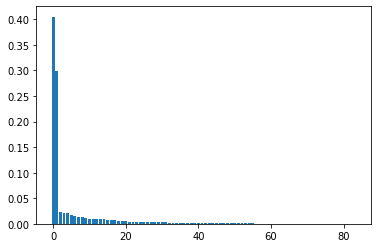

In [25]:
#랜덤 포레스트 모델의 피처 중요도 분석하기
    #학습한 모델의 피처 중요도를 그래프로 살펴보기
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] #argsort 작은값 순서대로 index를 반환해줌 #[::-1] 역순으로 반환
plt.bar(range(X.shape[1]), importances[indices])    #처음부터 끝까지 -1칸만큼 반환


#학습한 모델의 피처 중요도를 출력하기
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))

In [30]:
sorted(feature, key = lambda tup: tup[1], reverse=True)[:10] #기준을 lambda tup[1]값에 맞춰서 indexing함
                                                            #Reverse=True로 해서 높은값 순서대로 정렬

[('factory_price', 0.405022256097483),
 ('maker_apple', 0.29796421519280974),
 ('phone_model_galaxy s3 3g 8gb', 0.022313643571095738),
 ('phone_model_iphone se 64gb', 0.02136380128765041),
 ('price_index', 0.02032717495627416),
 ('phone_model_galaxy s4 32gb', 0.016402955150058785),
 ('month_2017-03', 0.01495341247555335),
 ('maker_samsung', 0.014134413967138791),
 ('phone_model_galaxy s6 32gb', 0.012402091374350685),
 ('month_2016-05', 0.010664272192195689)]

In [31]:
#factory price, apple 피처가 가격에 영향이 있는 피쳐로 분류됨

In [34]:
#피쳐 중요도 분석하기
    #영향력 있는 month 피쳐를 순서대로 정렬하기
for sorted_feature in sorted(feature, key = lambda tup: tup[1], reverse=True):
    if "month" in sorted_feature[0]:
        print(sorted_feature)          #그 결과 2017년 3월과 2016년 5월이 가장 영향력 있는 변수로 작용
                                        #최근에 가까울 수록 중요하게 작용)
            

('month_2017-03', 0.01495341247555335)
('month_2016-05', 0.010664272192195689)
('month_2016-09', 0.008582790953113689)
('month_2016-04', 0.007568936802231128)
('month_2016-10', 0.006429739337294918)
('month_2016-06', 0.004445558949243615)
('month_2016-08', 0.003657019458957678)
('month_2016-07', 0.0027063896271626135)
('month_2016-03', 0.0024841667091228823)
('month_2016-02', 0.0011773050148741369)


In [41]:
#stpe2: 피쳐 엔지니어링: 예측모델 개선하기
    #create_date
df = pd.read_csv("../data/used_mobile_phone.csv")

from datetime import datetime
import time

#create_date 계량화하기위해 unixtime 함수 만들어주기
def date_to_unixtime(date_str):
    timestamp = time.mktime(datetime.strptime(date_str,"%Y-%m-%d").timetuple())
    return timestamp

In [47]:
#현재와 얼마나 가까운 데이터인지 점수화하기 위해 unixtime 변수 새로 생성하기
df["create_unixtime"] = df["create_date"].apply(lambda x: date_to_unixtime(x[:10]))

#unixtime에 min-max 스케일링 해주기 => 값이 커서 보기 워낙 어려움
df["create_time_score"] = (df["create_unixtime"] - df["create_unixtime"].min()) /\
                            (df["create_unixtime"].max() - df['create_unixtime'].min())
df[["create_date","create_unixtime","create_time_score"]].head()

,create_date,create_unixtime,create_time_score
0,2017-03-19 4 35 00 PM,1.489849e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477408e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477321e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490195e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460300e+09,0.165468


In [56]:
#phone model 피처 가공하기
    #phone model에서 저장용량 추출하기 
df["phone_model_storage"] = df["phone_model"].apply(lambda x:x.split(" ")[-1])

    #phone model에서 기종 세부 이름 추출하기
df["phone_model_detail"] = df["phone_model"].apply(lambda x: ' '.join(x.split(" ")[:-1])) #마지막 용량빼고 split한거 list로 묶은후
                                                                                #" ".join(list) => list를 문자열로 묶음
df[["phone_model_storage","phone_model_detail"]].head()

,phone_model_storage,phone_model_detail
0,64gb,iphone 6
1,32gb,galaxy s6 edge
2,32gb,galaxy s6
3,32gb,lg g5
4,32gb,lg u


{'whiskers': [<matplotlib.lines.Line2D at 0x1e37b61cf48>,
 'caps': [<matplotlib.lines.Line2D at 0x1e37b61f688>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e37b61c548>,
 'medians': [<matplotlib.lines.Line2D at 0x1e37b624c48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e37b626d88>,
 'means': []}

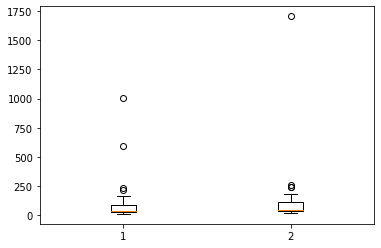

In [61]:
#그 전과 후 비교해보기
model_counts = df["phone_model"].value_counts()

model_detail_counts = df["phone_model_detail"].value_counts()
data = [model_counts,model_detail_counts]

#두 피처 끼리 비교해보기
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data) #쏠림 현상이 나아진걸 볼수있음

-1.3966616903783426
1.666982156397844


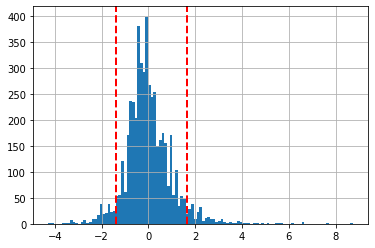

In [66]:
##감성분류 해보기##
    #그러기 위해서는 텍스트 -> 감정예측 # #감정 점수화필요# #가격을 기준으로 상태를 분류함#

df["price_by_group"] = df.groupby("phone_model_detail")["price"].transform(lambda x:(x-x.mean()) / x.std()) #transfo

ax = df["price_by_group"].hist(bins="auto")

lower_bound = df["price_by_group"].quantile(0.05)
upper_bound = df["price_by_group"].quantile(0.95)

ax.axvline(x=lower_bound, color="r",linestyle="dashed",linewidth=2)
ax.axvline(x=upper_bound, color="r",linestyle="dashed", linewidth=2)

print(lower_bound)
print(upper_bound)

In [74]:
#상태 분류하기
def get_price_level(price,lower,upper):
    if price <= lower:
        return "0"
    elif price >= upper:
        return "2"
    else:
        return "1"
    
df["price_lower"] = df.groupby("phone_model_detail")["price"].transform(lambda x:x.quantile(0.05))
df["price_upper"] = df.groupby("phone_model_detail")["price"].transform(lambda x:x.quantile(0.95))
df['price_level'] = df.apply(lambda row: get_price_level(row['price'], row['price_lower'], 
                                                         row['price_upper']), axis=1)
df[["price","price_lower","price_upper","price_level","text"]].head()

,price,price_lower,price_upper,price_level,text
0,550000.0,180000.0,680000.0,1,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...
1,380000.0,180000.0,414000.0,1,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...
2,300000.0,150000.0,349000.0,1,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...
3,290000.0,100000.0,500000.0,1,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...
4,280000.0,18000.0,400000.0,1,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...


In [75]:
#텍스트 전처리 작업
import pickle
import re

#중고나라 불용어 사전 불러오기
with open("../data/used_mobile_phone_stopwords.pkl","rb") as f:
    stopwords = pickle.load(f)

print(stopwords[:10])

['거래', '입니', '판매', '아이폰', '갤럭시', '골드', '팝', '만원', '폰', '시']


In [77]:
#텍스트에서 특수문자 제거 대신에 +랑 ,는 제거 안함.
#텍스트에서 숫자제거

from konlpy.tag import Okt

def text_cleansing(text):
    text = "".join(c for c in text if c.isalnum() or c in "+,")
    text = "".join([i for i in text if not i.isdigit()])
    return text

#불용어에 등장하지 않는 형태소만 추출하여 반환해주는 함수
def get_pos(x):
    tagger= Okt()
    poses = tagger.pos(x)
    return [pos[0] for pos in poses if pos[0] not in stopwords]

df["text"] = df["text"].apply(lambda x: text_cleansing(x))


In [ ]:
#빈출 형태소 2500개 선정하기 
from collections import Counter

#get_pos() 함수를 모든 텍스트 데이터에 적용하여 형태소 말뭉치 추출
corpus = sum(df['text'].apply(lambda x: get_pos(x)).tolist(), [])

In [84]:
#추출된 형태소 말뭉치에서 가장 많이 등장한 2500개 추출하기
counter = Counter(corpus)
common_words = [key for key, _ in counter.most_common(2500)] #_의미는 그냥 _특정값 무시해서 다 두루뭉술하게 쓸때
common_words

NameError: name 'corpus' is not defined

In [87]:
#클래스 불균형 위해서 부중긍 1:3:1로 데이터셋 맞춰주기
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#빈출 형태소를 제외하고 모든 형태소 제거해주기:)
def get_common_pos(x):
    tagger=Okt()
    poses = tagger.pos(x)
    return [pos[0] for pos in poses if pos[0] in common_words]

#1:3:1 비율로 랜덤 샘플링 수행하기
negative_random = df[df["price_level"] == 0].sample(321, random_state=30)
neutral_random = df[df["price_level"] == 1].sample(321*3, random_state=30)
positive_random = df[df["price_level"] ==  2].sample(321,random_state=30)

#샘플링 완료된 데이터셋
df_sample = negative_random.append(neutral_random).append(positive_random)

#tf-idf 수행해서 피처 변환하기
index_vectorizer = CountVectorizer(tokenizer = lambda x:get_common_pos(x))
X = index_vectorizer.fit_transform(df_sample["text"].tolist())
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

#감성분류위한 학습데이터셋 만들기
y = df_sample["price_level"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 30)
print(x_train.shape)
print(x_test.shape)

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
#상품상태분류하기
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#비선형 SVM 분류모델 학습하고 평가하기
svm = SVC(kernel = "rbf", C = 10.0, random_state=0, gamma=0.1)
svm.fit(x_train,y_train)
y_pred_ksvc = svm.predict(x_test)
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_ksvc))

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_ksvc)
print(confmat)

In [ ]:
#step3: 중고 휴대폰 거래가 예측하기
    #새로 만든 피쳐로 다시 로지스틱 회귀분석 학습하기
    

X = index_vectorizer.transform(df['text'].tolist())
X = tfidf_vectorizer.transform(X)
df['product_status'] = pd.Series(svm.predict(X))

df = df[['price', 'factory_price', 'maker', 'price_index', 'create_time_score', 'phone_model_storage',
                'phone_model_detail', 'product_status']]
df = pd.get_dummies(df, columns=['maker', 'phone_model_storage', 'phone_model_detail', 'product_status'])

X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

importances = forest.feature_importances_
plt.plot(importances, "o")

feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]